### **Import Libraries**

Ensure that all the necessary libraries are imported.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.preprocessing import image
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image

### **Mounting the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load and Preprocess Images**

In [ ]:
data_dir_train = '/content/drive/MyDrive/Data/FinalProject/Dataset/train'
data_dir_test = '/content/drive/MyDrive/Data/FinalProject/Dataset/test'
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_images(data_dir, emotion_labels):
    images = []
    labels = []
    for label in emotion_labels:
        img_dir = os.path.join(data_dir, label)
        if not os.path.exists(img_dir):
            print(f"Directory {img_dir} does not exist")
            continue
        for img_name in os.listdir(img_dir):
            img_path = os.path.join(img_dir, img_name)
            try:
                img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
                img = image.img_to_array(img)
                img = np.repeat(img, 3, axis=-1)  # Convert to RGB
                img = img / 255.0
                images.append(img)
                labels.append(emotion_labels.index(label))
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

X_train, y_train = load_images(data_dir_train, emotion_labels)
X_test, y_test = load_images(data_dir_test, emotion_labels)

# Ensure labels are one-hot encoded
y_train = to_categorical(y_train, num_classes=len(emotion_labels))
y_test = to_categorical(y_test, num_classes=len(emotion_labels))

### **Explore and Visualize Data**

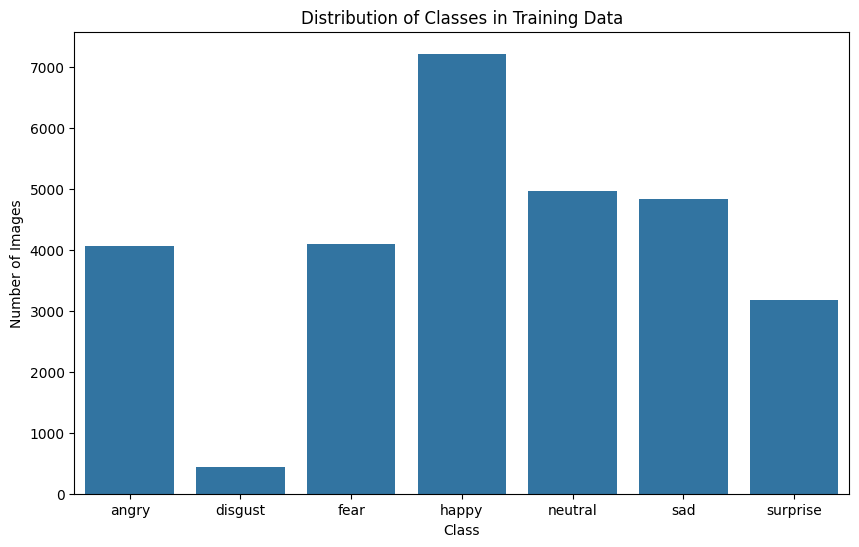

In [ ]:
import pandas as pd

# Create a DataFrame from the labels
labels_df = pd.DataFrame({'label': [emotion_labels[label] for label in np.argmax(y_train, axis=1)]})

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=labels_df, order=emotion_labels)
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(ticks=np.arange(len(emotion_labels)), labels=emotion_labels)
plt.show()

### **Sample Images: Displays a few images from each class.**

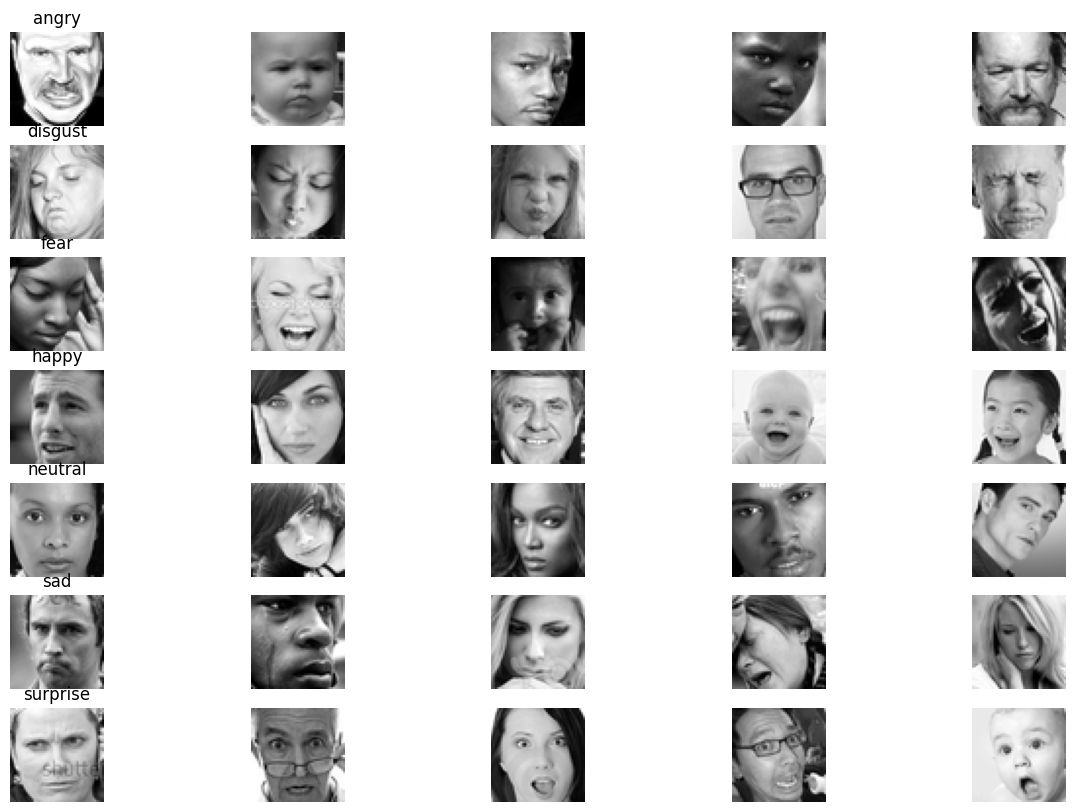

In [ ]:
def display_sample_images(X, y, emotion_labels, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i, label in enumerate(emotion_labels):
        label_indices = np.where(np.argmax(y, axis=1) == i)[0]
        sample_indices = np.random.choice(label_indices, num_samples, replace=False)
        for j, idx in enumerate(sample_indices):
            plt.subplot(len(emotion_labels), num_samples, i*num_samples + j + 1)
            gray_image = np.mean(X[idx], axis=-1)  # Convert RGB to grayscale by averaging the channels
            plt.imshow(gray_image, cmap='gray')
            plt.axis('off')
            if j == 0:
                plt.title(label)
    plt.show()

# Display sample images
display_sample_images(X_train, y_train, emotion_labels)

### **Image Dimensions: Verifies the dimensions of the images.**

In [ ]:
print(f"Image shape: {X_train[0].shape}")

Image shape: (48, 48, 3)


### **Mean and Standard Deviation of Pixel Values: Provides statistics on the pixel values.**

In [ ]:
mean_pixel_value = np.mean(X_train)
std_pixel_value = np.std(X_train)
print(f"Mean pixel value: {mean_pixel_value}")
print(f"Standard deviation of pixel values: {std_pixel_value}")

Mean pixel value: 0.5077813863754272
Standard deviation of pixel values: 0.25497347116470337


### **Image Intensity Distribution: Displays the intensity distribution of a sample image.**

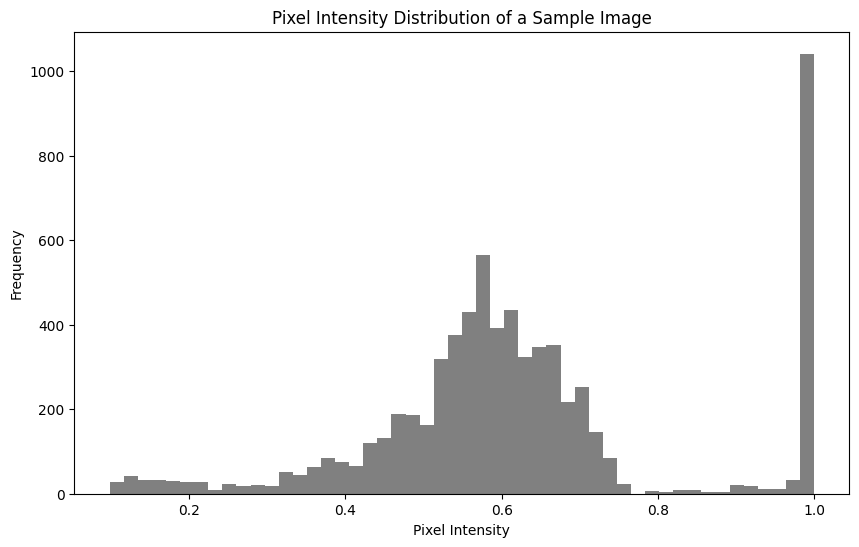

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(X_train[0].flatten(), bins=50, color='gray')
plt.title('Pixel Intensity Distribution of a Sample Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

### **Augmentation Examples: Shows examples of augmented images.**

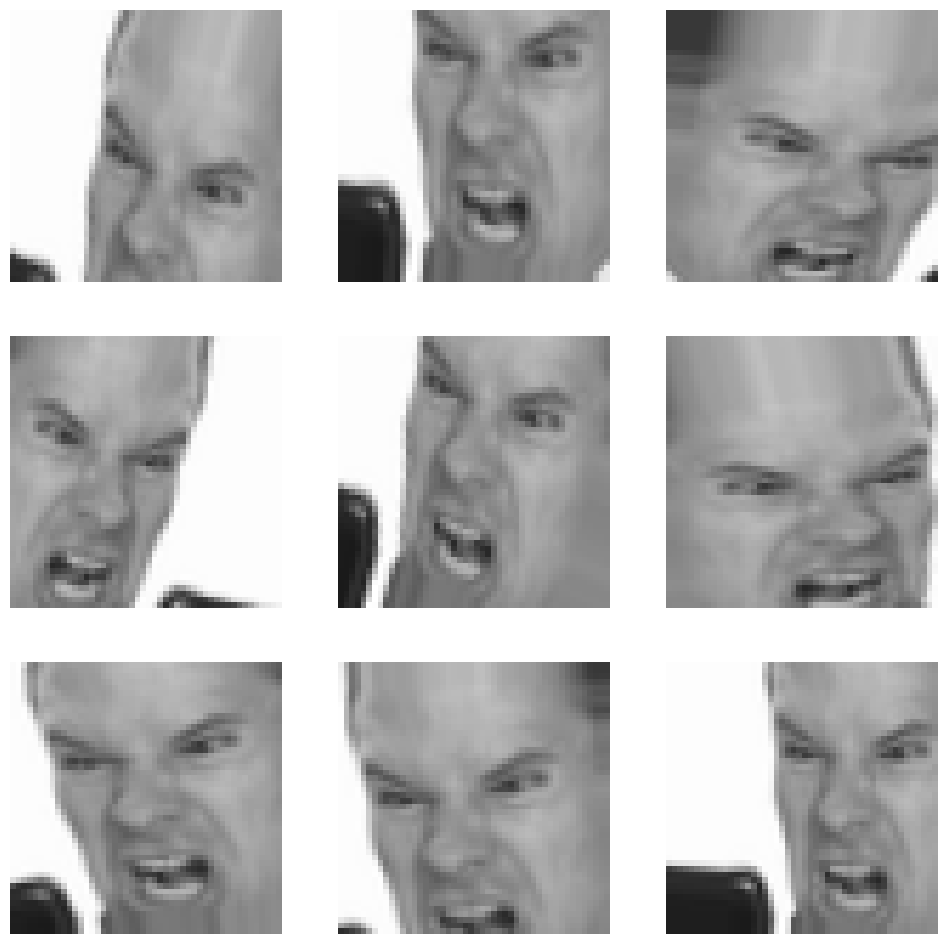

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Prepare a single image for augmentation
sample_image = X_train[0].reshape(1, 48, 48, 3)  # Adjust the shape for RGB

# Generate augmented images
aug_iter = datagen.flow(sample_image)

# Visualize the augmented images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = next(aug_iter)  # Python's built-in next() function
    image_augmented = batch[0]
    plt.imshow(image_augmented)
    plt.axis('off')
plt.show()

### **Correlation Matrix of Pixel Values: Visualizes the correlation between pixel values in a sample image.**

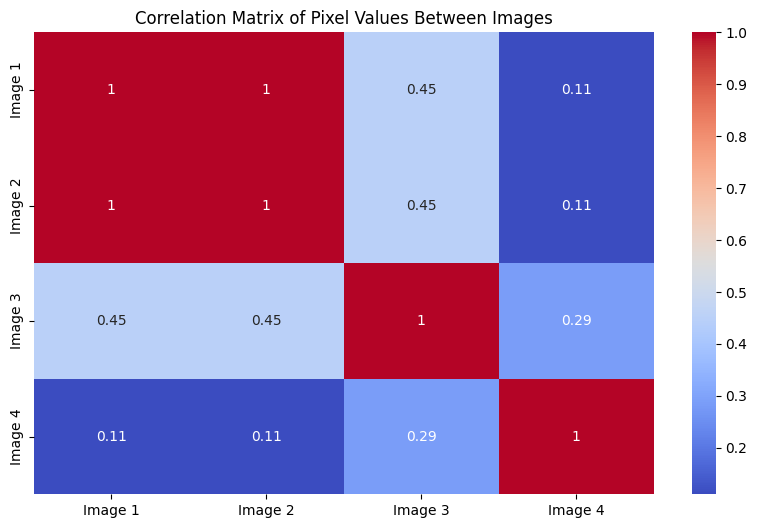

In [ ]:
# Select a few images
images = [np.mean(X_train[i], axis=-1).flatten() for i in range(4)]  # Convert each image to grayscale and flatten

# Calculate the correlation matrix between these images
correlation_matrix = np.corrcoef(images)

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=['Image 1', 'Image 2', 'Image 3', 'Image 4'], yticklabels=['Image 1', 'Image 2', 'Image 3', 'Image 4'])
plt.title('Correlation Matrix of Pixel Values Between Images')
plt.show()

### **Class Distribution in Training and Testing Sets: Compare class distributions between training and testing datasets.**

<ipython-input-11-2b5a0d2ea6fa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=labels_df_train, palette='viridis')


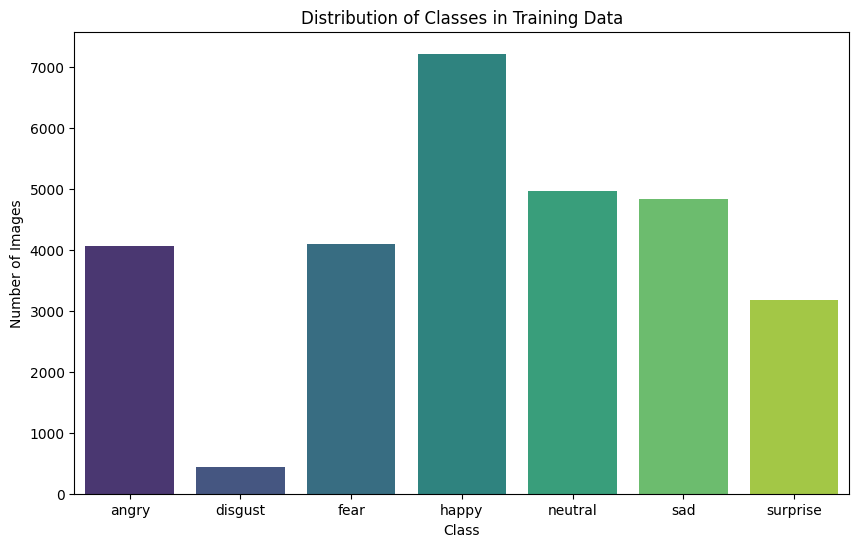

<ipython-input-11-2b5a0d2ea6fa>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=labels_df_test, palette='magma')


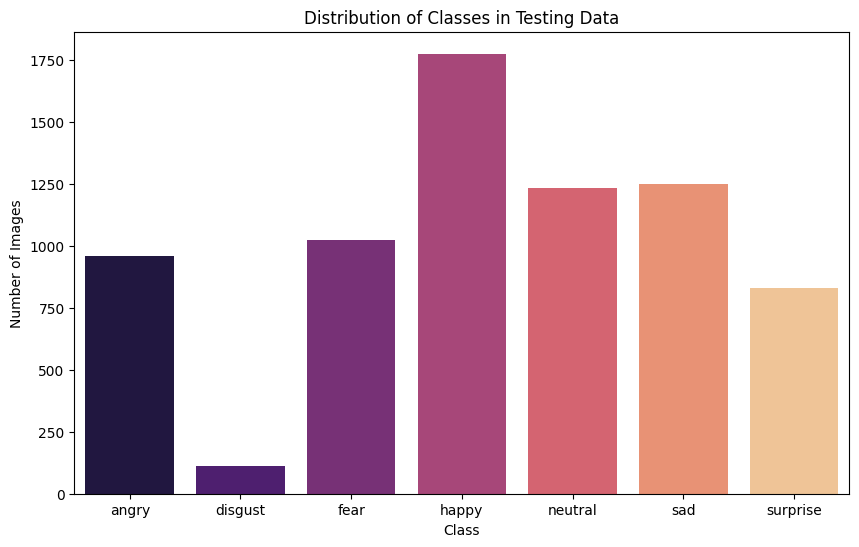

In [ ]:
# Convert one-hot encoded labels back to categorical form
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Create DataFrames
labels_df_train = pd.DataFrame({'label': y_train_labels})
labels_df_test = pd.DataFrame({'label': y_test_labels})

# Plot the distribution for training data
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=labels_df_train, palette='viridis')
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(ticks=np.arange(len(emotion_labels)), labels=emotion_labels)
plt.show()

# Plot the distribution for testing data
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=labels_df_test, palette='magma')
plt.title('Distribution of Classes in Testing Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(ticks=np.arange(len(emotion_labels)), labels=emotion_labels)
plt.show()

### **Principal Component Analysis (PCA): Visualize the data in 2D using PCA.**

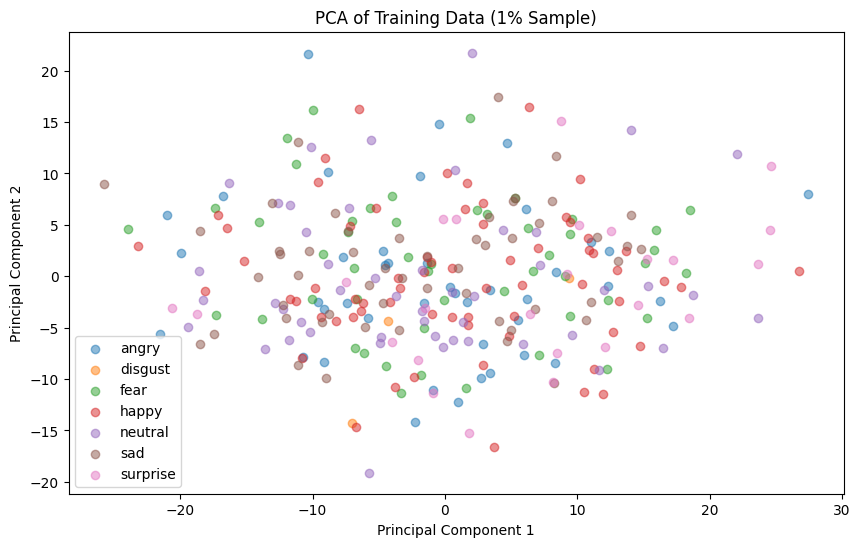

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Sample smaller subset of the data (1% of the dataset)
sample_size = int(0.01 * X_train.shape[0])  # 1% of the data
indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
X_train_sample = X_train_flat[indices]
y_train_sample = y_train_labels[indices]

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_sample)

# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(emotion_labels):
    indices = np.where(y_train_sample == i)[0]
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=label, alpha=0.5)
plt.title('PCA of Training Data (1% Sample)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### **Average Image for Each Class: Compute and visualize the average image for each class.**

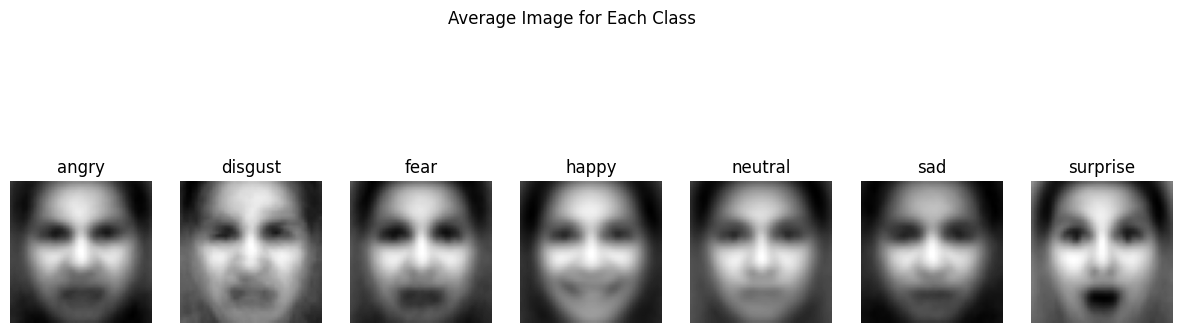

In [ ]:
import cv2

def calculate_average_image(images):
    return np.mean(images, axis=0)

plt.figure(figsize=(15, 5))
for i, label in enumerate(emotion_labels):
    indices = np.where(y_train_labels == i)[0]

    if len(indices) == 0:
        print(f"Skipping class '{label}' due to no images.")
        continue

    avg_image = calculate_average_image(X_train[indices])

    # Convert to grayscale
    avg_image_gray = np.mean(avg_image, axis=-1)

    # Normalize the image to the range [0, 1]
    avg_image_gray = (avg_image_gray - np.min(avg_image_gray)) / (np.max(avg_image_gray) - np.min(avg_image_gray))

    # Enhance the contrast using contrast stretching
    avg_image_gray = cv2.normalize(avg_image_gray, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    plt.subplot(1, len(emotion_labels), i + 1)
    plt.imshow(avg_image_gray, cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.suptitle("Average Image for Each Class")
plt.show()

In [ ]:
from sklearn.utils import class_weight

# Calculate class weights for imbalanced classes
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(np.argmax(y_train, axis=1)),
                                                  y=np.argmax(y_train, axis=1))
class_weights = dict(enumerate(class_weights))

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Fine-tune the last few layers of VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
for layer in vgg16.layers[:-4]:  # Fine-tune only the last block
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### ***Loading and Preprocessing the Dataset***

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Fine-tune the last few layers
for layer in vgg16.layers[:-4]:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(emotion_labels), activation='softmax'))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train, y_train, batch_size=64)
validation_generator = datagen.flow(X_test, y_test, batch_size=64)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 83ms/step - accuracy: 0.2937 - loss: 1.7529 - val_accuracy: 0.3930 - val_loss: 1.5588 - learning_rate: 1.0000e-04
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.4054 - loss: 1.5518 - val_accuracy: 0.4479 - val_loss: 1.4384 - learning_rate: 1.0000e-04
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.4458 - loss: 1.4546 - val_accuracy: 0.4603 - val_loss: 1.4105 - learning_rate: 1.0000e-04
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.4666 - loss: 1.4072 - val_accuracy: 0.4792 - val_loss: 1.3666 - learning_rate: 1.0000e-04
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.4836 - loss: 1.3753 - val_accuracy: 0.4922 - val_loss: 1.3382 - learning_rate: 1.0000e-04
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.4981 - loss: 1.3389 - val_accuracy: 0.4939 - val_loss: 1.3245 - learning_rate: 1.0000e-04
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accurac

In [ ]:
# Save the model
model.save('emotion_detection_model_vgg16.h5')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.5502 - loss: 1.2373
Loss: 1.2249325513839722
Accuracy: 0.5511284470558167


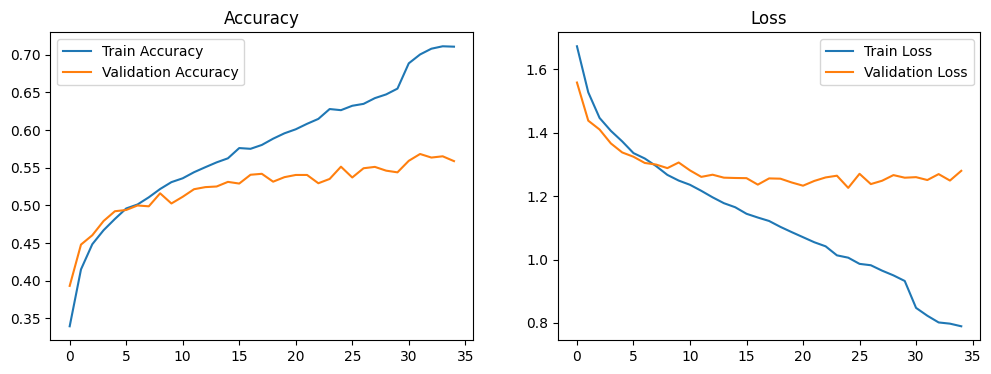

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()